# Principios básicos de Exploratory Data Analysis

In [16]:
# Comienzo con las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
# Continuo con la lectura del archivo
df = pd.read_csv('vgsales.csv')
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24


In [3]:
# Comienzo con la exploracion basica de los datos
# Esto me permite darme una idea de que es lo que contiene el dataset
df.sample(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
12917,12919,Zyuden Sentai Kyoryuger: Game de Gaburincho!!,3DS,2013.0,Action,Namco Bandai Games,0.00,0.00,0.05,0.00,0.05
3806,3808,F1 2009,PSP,2009.0,Racing,Codemasters,0.08,0.29,0.00,0.16,0.53
8099,8101,Re-Volt,N64,1999.0,Racing,Acclaim Entertainment,0.14,0.04,0.00,0.00,0.18
15712,15715,Amagoushi no Yakata,PS2,2007.0,Adventure,Nippon Ichi Software,0.00,0.00,0.02,0.00,0.02
11933,11935,Disney Sports Skateboarding,GBA,2002.0,Sports,Konami Digital Entertainment,0.05,0.02,0.00,0.00,0.07
8603,8605,Rapala Pro Fishing,XB,2004.0,Sports,Zoo Digital Publishing,0.12,0.03,0.00,0.01,0.16
14088,14090,FunkMaster Flex's Digital Hitz Factory,PS2,2003.0,Misc,Jester Interactive,0.02,0.01,0.00,0.00,0.04
11548,11550,Fireblade,XB,2002.0,Action,Midway Games,0.06,0.02,0.00,0.00,0.08
7079,7081,Saka-Tsuku DS: Touch and Direct,DS,2008.0,Sports,Sega,0.00,0.00,0.23,0.00,0.23
5409,5411,Rayman Legends,XOne,2014.0,Platform,Ubisoft,0.13,0.18,0.00,0.03,0.34


In [4]:
# Reviso cual es el tamaño del archivo con el numero de registros
df.shape
# El archivo tiene 16598 registros y 11 columnas

(16598, 11)

In [5]:
# Reviso el tipo de datos que contiene el data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [7]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [25]:
# Voy a cambiar el formato del año  numero entero
df['Year'] = df['Year'].astype('Int64')

In [26]:
df.head(2)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,165.48
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,80.48


In [11]:
# Reviso los datos vacios por cada columna
missing_values_count = df.isnull().sum()
missing_values_count[0:10]
# Existen muchos datos sin año

Rank             0
Name             0
Platform         0
Year           271
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [15]:
# Reviso el numero de valores unico en el caso de los videojuegos
#df['Year'].unique().__len__()
df['Year'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2003, 1986, 2000, <NA>, 1995, 2016, 1991, 1981, 1987, 1980, 1983, 2020,
 2017]
Length: 40, dtype: Int64

In [11]:
# Para sacar el total de los videojuegos

Total_Videojuegos = df.shape[0:1]
print(f'Existen in total de {Total_Videojuegos} videojusegos en el Dataframe')

Existen in total de (16598,) videojusegos en el Dataframe


In [12]:
# Para sacar el total de los generos analizados

Total_Generos = df['Genre'].unique().__len__()
print(f'Existen in total de {Total_Generos} generos en el Dataframe')

Existen in total de 12 generos en el Dataframe


In [13]:
# Para sacar el total de las plataformas analizadas

Total_Plataformas = df['Platform'].unique().__len__()
print(f'Existen in total de {Total_Plataformas} plataformas en el Dataframe')

Existen in total de 31 plataformas en el Dataframe


In [14]:
# Calcula el % total de datos no existentes
# Cuantos datos totales tenemos, y cuantos no tienen el año
total_cells = np.prod(df.shape)
total_missing = missing_values_count.sum()
# Calculo el porcentaje
percent_missing = (total_missing / total_cells) * 100
print(f"Porcentaje de datos que no existe: {percent_missing:.2f}%")

Porcentaje de datos que no existe: 0.18%


# Agrupamientos y graficos

In [63]:
# Total de ventas por año
# Necesito crear una columna que se llama Total Sales que sume todas la ventas
df['Total Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] +	df['Other_Sales'] + df['Global_Sales']

In [64]:
df.sample(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total Sales
1145,1147,Buzz! The Music Quiz,PS2,2005,Misc,Sony Computer Entertainment,0.00,1.18,0.00,0.43,1.61,3.22
9408,9410,Chicken Run,PS,2000,Adventure,Eidos Interactive,0.07,0.05,0.00,0.01,0.13,0.26
5667,5669,From TV Animation One Piece: Grand Battle! 3,PS2,2003,Fighting,Namco Bandai Games,0.00,0.00,0.32,0.00,0.32,0.64
12459,12461,The Great Escape,XB,2003,Action,SCi,0.05,0.01,0.00,0.00,0.06,0.12
10780,10782,Skylanders: Spyro's Adventure,PC,2011,Action,Activision,0.05,0.03,0.00,0.01,0.10,0.19


In [65]:
# Agrupamiento de Ventas totales por año
df.groupby(["Year"])["Total Sales"].sum()


Year
1980      22.76
1981      71.45
1982      57.74
1983      33.59
1984     100.71
1985     107.89
1986      74.15
1987      43.44
1988      94.43
1989     146.90
1990      98.76
1991      64.46
1992     152.30
1993      91.97
1994     158.39
1995     176.22
1996     398.30
1997     402.05
1998     512.80
1999     502.39
2000     403.19
2001     662.96
2002     790.49
2003     715.46
2004     838.16
2005     919.35
2006    1041.56
2007    1221.57
2008    1357.39
2009    1334.40
2010    1200.81
2011    1031.92
2012     726.84
2013     736.09
2014     674.15
2015     528.70
2016     141.80
2017       0.10
2020       0.58
Name: Total Sales, dtype: float64

<Axes: xlabel='Year'>

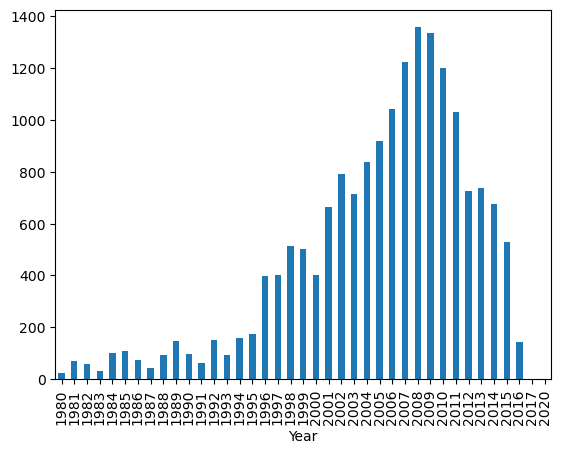

In [66]:
df.groupby(["Year"])["Total Sales"].sum().plot.bar()

In [67]:
ventas_anuales = df.groupby(["Year"])["Total Sales"].sum()
ventas_anuales

Year
1980      22.76
1981      71.45
1982      57.74
1983      33.59
1984     100.71
1985     107.89
1986      74.15
1987      43.44
1988      94.43
1989     146.90
1990      98.76
1991      64.46
1992     152.30
1993      91.97
1994     158.39
1995     176.22
1996     398.30
1997     402.05
1998     512.80
1999     502.39
2000     403.19
2001     662.96
2002     790.49
2003     715.46
2004     838.16
2005     919.35
2006    1041.56
2007    1221.57
2008    1357.39
2009    1334.40
2010    1200.81
2011    1031.92
2012     726.84
2013     736.09
2014     674.15
2015     528.70
2016     141.80
2017       0.10
2020       0.58
Name: Total Sales, dtype: float64

In [68]:
fig = px.bar(
    ventas_anuales.reset_index(),
    x="Year",
    y="Total Sales",
    title="Cantidad de Ventas por Año"
)

fig.show()


In [69]:
# Para sacar el año con mas ventas
ventas_por_anio = df.groupby("Year")["Year"].count()
anio_top = ventas_por_anio.idxmax()
ventas_top = ventas_por_anio.max()
ventas_por_anio = df.groupby("Year")["Year"].count()
(anio_top, ventas_por_anio[anio_top])

(np.int64(2009), np.int64(1431))

In [70]:
# Para sacar los videojuegos mas vendidos por año
top_por_anio = df.loc[df.groupby("Year")["Total Sales"].idxmax()]
top_por_anio = top_por_anio.sort_values("Year")
top_por_anio[['Name', 'Year', 'Total Sales']].sort_values('Total Sales', ascending=False)


,Name,Year,Total Sales
0,Wii Sports,2006,165.48
1,Super Mario Bros.,1985,80.48
2,Mario Kart Wii,2008,71.65
3,Wii Sports Resort,2009,66.00
4,Pokemon Red/Pokemon Blue,1996,62.75
5,Tetris,1989,60.52
9,Duck Hunt,1984,56.62
10,Nintendogs,2005,49.51
12,Pokemon Gold/Pokemon Silver,1999,46.19
13,Wii Fit,2007,45.44


In [71]:
# Grafico del videojuego mas vendido por año
fig = px.bar(
    top_por_anio,
    x="Year",
    y="Total Sales",
    color="Name",
    title="Top Seller por Año (Videojuego más vendido)",
    hover_data=["Name", "Platform", "Genre", "Publisher", "Total Sales"],
)

fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Ventas Totales",
    legend_title="Videojuego"
)

fig.show()

In [75]:
#Para sacar la plataforma con mas ingresos por año
top_pltfm_por_anio = df.loc[df.groupby("Platform")["Total Sales"].idxmax()]
top_pltfm_por_anio = top_pltfm_por_anio.sort_values("Platform")
top_pltfm_por_anio[['Platform', 'Year', 'Total Sales']].sort_values('Total Sales', ascending=False)

,Platform,Year,Total Sales
0,Wii,2006,165.48
1,NES,1985,80.48
4,GB,1996,62.75
6,DS,2006,60.02
15,X360,2010,43.64
16,PS3,2013,42.79
17,PS2,2004,41.62
18,SNES,1990,41.23
25,GBA,2002,31.69
32,3DS,2013,28.70


In [42]:
# Grafico de la plataforma
fig = px.bar(
    top_pltfm_por_anio.sort_values("Total Sales", ascending=False),
    x="Platform",
    y="Total Sales",
    color="Platform",
    labels={
        "Platform": "Plataforma",
        "Total Sales": "Ventas Totales (millones)",
    },
    title="Mejor Año de Ventas por Plataforma"
)

fig.show()



In [55]:
# Para el desgloce de los ingresos por Area de ventas
df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

NA_Sales        4392.95
EU_Sales        2434.13
JP_Sales        1291.02
Other_Sales      797.75
Global_Sales    8920.44
dtype: float64

In [62]:
desgloce_ventas_por_anio = df.groupby("Year")[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
desgloce_ventas_por_anio.style.background_gradient(cmap='Blues')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,
1980,10.590000,0.670000,0.000000,0.120000,11.380000
1981,33.400000,1.960000,0.000000,0.320000,35.770000
1982,26.920000,1.650000,0.000000,0.310000,28.860000
1983,7.760000,0.800000,8.100000,0.140000,16.790000
1984,33.280000,2.100000,14.270000,0.700000,50.360000
1985,33.730000,4.740000,14.560000,0.920000,53.940000
1986,12.500000,2.840000,19.810000,1.930000,37.070000
1987,8.460000,1.410000,11.630000,0.200000,21.740000
1988,23.870000,6.590000,15.760000,0.990000,47.220000


In [60]:
#Desgloce por plataforma
ventas_por_plataforma = df.groupby("Platform")[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
ventas_por_plataforma.style.background_gradient(cmap='Blues')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,90.600000,5.470000,0.000000,0.910000,97.080000
3DO,0.000000,0.000000,0.100000,0.000000,0.100000
3DS,78.870000,58.520000,97.350000,12.630000,247.460000
DC,5.430000,1.690000,8.560000,0.270000,15.970000
DS,390.710000,194.650000,175.570000,60.530000,822.490000
GB,114.320000,47.820000,85.120000,8.200000,255.450000
GBA,187.540000,75.250000,47.330000,7.730000,318.500000
GC,133.460000,38.710000,21.580000,5.180000,199.360000
GEN,19.270000,5.520000,2.670000,0.890000,28.360000


In [61]:
#Desgloce por genero
ventas_por_genero = df.groupby("Genre")[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()
ventas_por_genero.style.background_gradient(cmap='Blues')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.830000,525.000000,159.950000,187.380000,1751.180000
Adventure,105.800000,64.130000,52.070000,16.810000,239.040000
Fighting,223.590000,101.320000,87.350000,36.680000,448.910000
Misc,410.240000,215.980000,107.760000,75.320000,809.960000
Platform,447.050000,201.630000,130.770000,51.590000,831.370000
Puzzle,123.780000,50.780000,57.310000,12.550000,244.950000
Racing,359.420000,238.390000,56.690000,77.270000,732.040000
Role-Playing,327.280000,188.060000,352.310000,59.610000,927.370000
Shooter,582.600000,313.270000,38.280000,102.690000,1037.370000


In [83]:
#Grafico para comparar ventas entre generos por año
df_gen_year = df[['Year', 'Genre', 'Total Sales']]
df_gen_year

,Year,Genre,Total Sales
0,2006,Sports,165.48
1,1985,Platform,80.48
2,2008,Racing,71.65
3,2009,Sports,66.00
4,1996,Role-Playing,62.75
...,...,...,...
16593,2002,Platform,0.02
16594,2003,Shooter,0.02
16595,2008,Racing,0.01
16596,2010,Puzzle,0.02


In [84]:

fig = px.line(
    df_gen_year.groupby(['Year', 'Genre'])['Total Sales'].sum().reset_index(),
    x="Year",
    y="Total Sales",
    color="Genre",
    markers=True,
    labels={
        "Year": "Año",
        "Global_Sales": "Ventas Totales)",
        "Genre": "Género"
    },
    title="Comparación de Ventas Globales por Género y Año"
)

fig.show()


In [102]:
# Para sacar los grtaficos interesantes
# El top 5 de plataformas mas vendidas
top5_plataformas = (
    df.groupby("Platform")["Total Sales"]
      .sum()
      .sort_values(ascending=False)
      .head(5)
      .reset_index()
)


In [109]:

fig = px.bar(
    top5_plataformas,
    x="Total Sales",
    y="Platform",
    orientation="h",
    color="Platform",
    color_discrete_sequence= px.colors.sequential.Viridis,
    labels={
        "Platform": "Plataforma",
        "Total Sales": "Ventas Totales"
    },
    title="Top 5 Plataformas por Ventas Totales"
)

fig.show()


In [115]:
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr()
corr

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


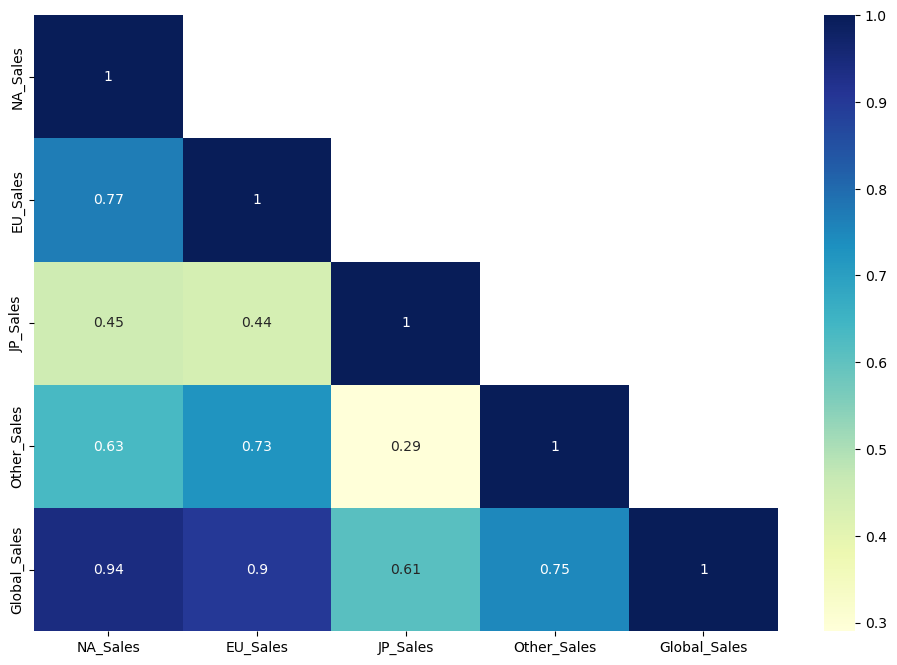

In [114]:
plt.figure(figsize=(12,8))
corr = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(method='pearson')
df_lt = corr.where(np.tril(np.ones(corr.shape)).astype(bool))
hmap = sns.heatmap(df_lt, cmap="YlGnBu", annot=True)

# Crecimiento de los ultimos 4 años:

1) qué género ha tenido el mayor y menor crecimiento,

2) qué plataforma ha tenido el mayor y menor crecimiento,

3) qué videojuego ha tenido el mayor y menor crecimiento

* 2 elementos adicionales que muestren oportunidades de mercado

In [134]:

ultimos_4 = sorted(df['Year'].dropna().unique())[-4:]
df4 = df[df['Year'].isin(ultimos_4)]
df4

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24,28.48
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49,16.98
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67,15.34
101,102,Call of Duty: Black Ops 3,XOne,2015,Shooter,Activision,4.52,2.09,0.01,0.67,7.30,14.59
109,110,Fallout 4,PS4,2015,Role-Playing,Bethesda Softworks,2.47,3.15,0.24,1.10,6.96,13.92
...,...,...,...,...,...,...,...,...,...,...,...,...
16565,16568,Teslagrad,PSV,2015,Platform,Rain Games,0.00,0.01,0.00,0.00,0.01,0.02
16569,16572,Resident Evil 4 HD,XOne,2016,Shooter,Capcom,0.01,0.00,0.00,0.00,0.01,0.02
16570,16573,Farming 2017 - The Simulation,PS4,2016,Simulation,UIG Entertainment,0.00,0.01,0.00,0.00,0.01,0.02
16576,16579,Rugby Challenge 3,XOne,2016,Sports,Alternative Software,0.00,0.01,0.00,0.00,0.01,0.02


In [136]:
# Crecimiento por ventas (mayor y menor)
ventas_gen = (
    df4.groupby(['Year', 'Genre'])['Total Sales']
      .sum()
      .reset_index()
)
ventas_gen.head()

,Year,Genre,Total Sales
0,2015,Action,141.36
1,2015,Adventure,16.06
2,2015,Fighting,15.56
3,2015,Misc,23.35
4,2015,Platform,12.10


In [137]:
# Crecimiento porcentual por genero 
ventas_gen['pct_change'] = (
    ventas_gen.groupby('Genre')['Total Sales']
              .pct_change()
)
ventas_gen

,Year,Genre,Total Sales,pct_change
0,2015,Action,141.36,NaN
1,2015,Adventure,16.06,NaN
2,2015,Fighting,15.56,NaN
3,2015,Misc,23.35,NaN
4,2015,Platform,12.10,NaN
5,2015,Puzzle,1.39,NaN
6,2015,Racing,15.84,NaN
7,2015,Role-Playing,72.87,NaN
8,2015,Shooter,132.27,NaN
9,2015,Simulation,11.23,NaN


In [143]:
mayor_crecimiento_gen = ventas_gen.loc[ventas_gen['pct_change'].idxmax()]
menor_crecimiento_gen = ventas_gen.loc[ventas_gen['pct_change'].idxmin()]
print(mayor_crecimiento_gen)
print(menor_crecimiento_gen)

Year                 2020
Genre          Simulation
Total Sales          0.58
pct_change       -0.25641
Name: 25, dtype: object
Year               2017
Genre            Action
Total Sales        0.02
pct_change    -0.999497
Name: 23, dtype: object


In [146]:
# Crecimiento por plataforma (mayor y menor)
ventas_plat = (
    df4.groupby(['Year', 'Platform'])['Total Sales']
      .sum()
      .reset_index()
)
ventas_plat.head()

,Year,Platform,Total Sales
0,2015,3DS,53.96
1,2015,PC,16.10
2,2015,PS3,36.43
3,2015,PS4,230.54
4,2015,PSP,0.24


In [147]:
# Crecimiento porcentual por plataforma
ventas_plat['pct_change'] = (
    ventas_plat.groupby('Platform')['Total Sales']
              .pct_change()
)
ventas_plat

,Year,Platform,Total Sales,pct_change
0,2015,3DS,53.96,NaN
1,2015,PC,16.10,NaN
2,2015,PS3,36.43,NaN
3,2015,PS4,230.54,NaN
4,2015,PSP,0.24,NaN
5,2015,PSV,14.17,NaN
6,2015,Wii,3.11,NaN
7,2015,WiiU,32.75,NaN
8,2015,X360,26.07,NaN
9,2015,XOne,115.33,NaN


In [148]:
mayor_crecimiento_plat = ventas_plat.loc[ventas_plat['pct_change'].idxmax()]
menor_crecimiento_plat = ventas_plat.loc[ventas_plat['pct_change'].idxmin()]
print(mayor_crecimiento_plat)
print(menor_crecimiento_plat)

Year               2016
Platform            PSV
Total Sales        6.78
pct_change    -0.521524
Name: 14, dtype: object
Year               2017
Platform            PS4
Total Sales        0.06
pct_change    -0.999236
Name: 18, dtype: object


In [149]:
# Crecimiento por videojuego (mayor y menor)
ventas_game = (
    df4.groupby(['Year', 'Name'])['Total Sales']
      .sum()
      .reset_index()
)
ventas_game.head()

,Year,Name,Total Sales
0,2015,3rd Super Robot Wars Z: Tengoku-Hen,0.68
1,2015,7 Roses: A Darkness Rises,0.04
2,2015,7th Dragon III Code: VFD,0.31
3,2015,A Good Librarian Like a Good Shepherd: Library...,0.06
4,2015,Abunai: Koi no Sousa Shitsu,0.04


In [150]:
# Crecimiento porcentual por plataforma
ventas_game['pct_change'] = (
    ventas_game.groupby('Name')['Total Sales']
              .pct_change()
)
ventas_game

,Year,Name,Total Sales,pct_change
0,2015,3rd Super Robot Wars Z: Tengoku-Hen,0.68,NaN
1,2015,7 Roses: A Darkness Rises,0.04,NaN
2,2015,7th Dragon III Code: VFD,0.31,NaN
3,2015,A Good Librarian Like a Good Shepherd: Library...,0.06,NaN
4,2015,Abunai: Koi no Sousa Shitsu,0.04,NaN
...,...,...,...,...
571,2016,Zero Escape: Zero Time Dilemma,0.24,NaN
572,2016,ZombiU,0.11,NaN
573,2017,Brothers Conflict: Precious Baby,0.02,NaN
574,2017,Phantasy Star Online 2 Episode 4: Deluxe Package,0.08,NaN


In [151]:
mayor_crecimiento_game = ventas_game.loc[ventas_game['pct_change'].idxmax()]
menor_crecimiento_game = ventas_game.loc[ventas_game['pct_change'].idxmin()]
print(mayor_crecimiento_game)
print(menor_crecimiento_game)

Year                                  2016
Name           Digimon Story: Cyber Sleuth
Total Sales                           0.22
pct_change                       -0.352941
Name: 409, dtype: object
Year                            2016
Name           Need for Speed (2015)
Total Sales                     0.06
pct_change                 -0.990244
Name: 475, dtype: object


In [ ]:
# Grafica de crecimiento por Genero
fig = px.line(
    ventas_gen,
    x="Year",
    y="pct_change",
    color="Genre",
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Bold,
    labels={
        "Year": "Año",
        "pct_change": "Crecimiento (%)",
        "Genre": "Género"
    },
    title="Crecimiento por Género (pct_change)"
)

fig.update_layout(yaxis_tickformat=".0%")
fig.show()


In [154]:
# Grafica de crecimiento por Genero
fig = px.line(
    ventas_plat,
    x="Year",
    y="pct_change",
    color="Platform",
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Vivid,
    labels={
        "Year": "Año",
        "pct_change": "Crecimiento (%)",
        "Platform": "Plataforma"
    },
    title="Crecimiento por Plataforma (pct_change)"
)

fig.update_layout(yaxis_tickformat=".0%")
fig.show()


In [155]:
# Grafica de crecimiento por Videojuego
fig = px.line(
    ventas_game,
    x="Year",
    y="pct_change",
    color="Name",
    markers=True,
    color_discrete_sequence=px.colors.qualitative.Vivid,
    labels={
        "Year": "Año",
        "pct_change": "Crecimiento (%)",
        "Platform": "Name"
    },
    title="Crecimiento por Juego (pct_change)"
)

fig.update_layout(yaxis_tickformat=".0%")
fig.show()
